In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

In [2]:
df = pd.read_csv('Speed Dating Data.csv',  encoding="ISO-8859-1")

In [3]:
## Indepedent Variables (Top 10 features in terms of correlation with 'match')
idv = df.corr()['match'].sort_values()[::-1][:11].index[3:]
df = df.fillna(df.mean())
idv

Index(['like_o', 'like', 'fun_o', 'fun', 'shar_o', 'shar', 'attr_o', 'attr'], dtype='object')

In [4]:
df['match'].value_counts()

0    6998
1    1380
Name: match, dtype: int64

In [5]:
x, y = df[idv], df['match']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

In [6]:
meths = ['kmeans','decision_tree','svm', 'mlp']
train_acc = []
test_acc = []
auc = []

Now lets try to predict <b>Match</b> using different methods and compare them to identify the best classifier. 

## Method 1: KMeans Clustering

In [7]:
km = KMeans(2)
train_labels = km.fit_predict(x_train.to_numpy())
val_labels = km.predict(x_test.to_numpy())

print('Train Score:',accuracy_score(train_labels, y_train))
print('Val. Score:',accuracy_score(val_labels, y_test))
print('Average AUC on val. data:',roc_auc_score(km.predict(x_test),y_test))

train_acc.append(accuracy_score(train_labels, y_train))
test_acc.append(accuracy_score(val_labels, y_test))
auc.append(roc_auc_score(km.predict(x_test),y_test))

Train Score: 0.6016114592658908
Val. Score: 0.6020286396181385
Average AUC on val. data: 0.6239590006406149


## Method 2: Decision Tree

In [8]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
train_labels = dt.predict(x_train)
val_labels = dt.predict(x_test)

print('Train Score:',accuracy_score(train_labels, y_train))
print('Val. Score:',accuracy_score(val_labels, y_test))
print('Average AUC on val. data:',roc_auc_score(dt.predict(x_test),y_test))

train_acc.append(accuracy_score(train_labels, y_train))
test_acc.append(accuracy_score(val_labels, y_test))
auc.append(roc_auc_score(dt.predict(x_test),y_test))

Train Score: 0.9962697702178455
Val. Score: 0.7810262529832935
Average AUC on val. data: 0.6120635046321957


## Method 3: SVM

In [9]:
svm = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svm.fit(x_train, y_train)
train_labels = svm.predict(x_train)
val_labels = svm.predict(x_test)

print('Train Score:',accuracy_score(train_labels, y_train))
print('Val. Score:',accuracy_score(val_labels, y_test))
print('Average AUC on val. data:',roc_auc_score(svm.predict(x_test),y_test))

train_acc.append(accuracy_score(train_labels, y_train))
test_acc.append(accuracy_score(val_labels, y_test))
auc.append(roc_auc_score(svm.predict(x_test),y_test))

Train Score: 0.8595941509997016
Val. Score: 0.8562052505966588
Average AUC on val. data: 0.7848671788106878


## Method 4: Multilayer Perceptron (Neural Networks)

In [10]:
nn = MLPClassifier(random_state=1, max_iter=300).fit(x_train, y_train)
train_labels = nn.predict(x_train)
val_labels = nn.predict(x_test)

print('Train Score:',accuracy_score(train_labels, y_train))
print('Val. Score:',accuracy_score(val_labels, y_test))
print('Average AUC on val.data:',roc_auc_score(nn.predict(x_test),y_test))

train_acc.append(accuracy_score(train_labels, y_train))
test_acc.append(accuracy_score(val_labels, y_test))
auc.append(roc_auc_score(nn.predict(x_test),y_test))

Train Score: 0.8569083855565502
Val. Score: 0.8621718377088305
Average AUC on val.data: 0.7629749970859075


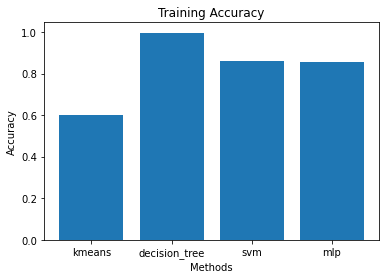

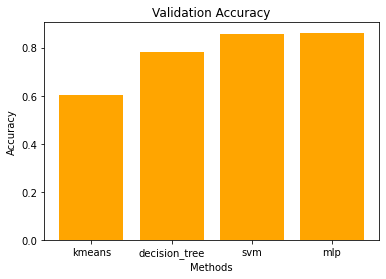

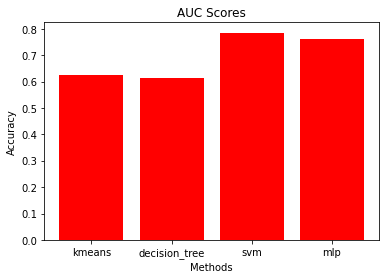

In [11]:
plt.bar(meths, train_acc, label = 'train_acc')
plt.title('Training Accuracy')
plt.xlabel('Methods')
plt.ylabel('Accuracy')
plt.show()

plt.bar(meths, test_acc, label = 'val_acc', color = 'orange')
plt.title('Validation Accuracy')
plt.xlabel('Methods')
plt.ylabel('Accuracy')
plt.show()

plt.bar(meths, auc, label = 'auc', color = 'red')
plt.title('AUC Scores')
plt.xlabel('Methods')
plt.ylabel('Accuracy')
plt.show()

We can conclude that SVM is the best method for this dataset with a highest AUC score of 78%